# Mathematical Background of Lattices

This is the first post in the series: Introduction to Lattice-based Cryptography. We focus on lattices as an independent mathematical concept and its properties. However, we focus on aspects that would be useful in the study of Lattice-based Cryptography.

Throughout this series, we use 2-dimensions and 3-dimensions because they are easy to work with. In practice we use sufficiently higher dimensions.

The only prequesite to start this series is to understand the following: 
- $\mathbb{R}$ represents the set of all real numbers. 
- $\mathbb{Z}$ is the set of all integers.
- $\mathbb{Q}$ is the set of all rational numbers.
- $\mathbb{R}^n$ is the set of all n-dimensional real vectors
- $\mathbb{Z}^n$ is the set of all n-dimensional integer vectors

## What is a Lattice?

A Lattice $L$ is an infinite set of vectors $\mathbf{v}$ constructed based two condition: **discreteness** and **additivity**.

Formally, an $n$-dimensional *lattice* $L$ is a **discrete addictive subgroup** of $\mathbb{R}^n$ generated by the basis $B = \{b_1, b_2, ..., b_n\}$: $$L = L(B):= \{\sum_{i = 1}^{n}z_ib_i: z_i \in \mathbb{Z}\}$$

- **discrete**: This means that every vector point $\mathbf{v} \in L$ has some "neighborhood" in which $\mathbf{v}$ is the only lattice point. Loosely speaking, this means that, for every point $\mathbf{v}$ there is "good space" around it
- **addictive subgroup**: a lattice $L$ is an addictive subgroup if it contains identity element $0 \in \mathbb{R}^n$(the zero vector), and if any $\mathbf{v}, \mathbf{w} \in L$, we have $-\mathbf{v} \in L$, $-\mathbf{w} \in L$ and $\mathbf{v} + \mathbf{w} \in L$

Below, we will see what a lattice is and what it is not.

In [67]:
from typing import List
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray
from numpy import typing

def points_generator_for_2d(basis_1: NDArray, basis_2: NDArray):
    # Generate lattice points
    x = np.arange(-5, 6)
    y = np.arange(-5, 6)
    lattice_points = np.array([i * basis_1 + j * basis_2 for i in x for j in y])
    lattice_points = np.unique(lattice_points, axis=0)
    return lattice_points

def plotter_2d(points: NDArray):    
    # Plot
    plt.figure(figsize=(12, 12))
    plt.scatter(points[:, 0], points[:, 1], color='red', label='Lattice Points')
    # plt.quiver(0, 0, basis_1[0], basis_1[1], angles='xy', scale_units='xy', scale=1, color='red', label='basis 1')
    # plt.quiver(0, 0, basis_2[0], basis_2[1], angles='xy', scale_units='xy', scale=1, color='green', label='basis 2')
    
    plt.xlim(-12, 12)
    plt.ylim(-12, 12)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.title('2D Lattice')
    plt.show()

def points_generator_for_3d(basis_1: NDArray, basis_2: NDArray, basis_3: NDArray, start:int = -15, stop: int = 16):
    # Generate lattice points
    x = np.arange(start, stop)
    y = np.arange(start, stop)
    z = np.arange(start, stop)
    lattice_points = np.array([i * basis_1 + j * basis_2 + k * basis_3 for i in x for j in y for k in z])
    lattice_points = np.unique(lattice_points, axis=0)
    return lattice_points

def plotter_3d(points: NDArray):
    # Plot the lattice
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', s=10)

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_xlim(-12, 12)
    ax.set_ylim(-12, 12)
    ax.set_zlim(-12, 12)

    ax.view_init(elev=20, azim=45)  # Adjust as needed
    
    # Set equal scaling for all axes
    ax.set_box_aspect([1, 1, 1])
    
    # Show the plot
    plt.title("3D Lattice")
    plt.show()

- The singleton set $\{0\} \in \mathbb{R}^n$ is a lattice $L$(for any positive integer $n$). That is, the zero vector in any dimension is a lattice.

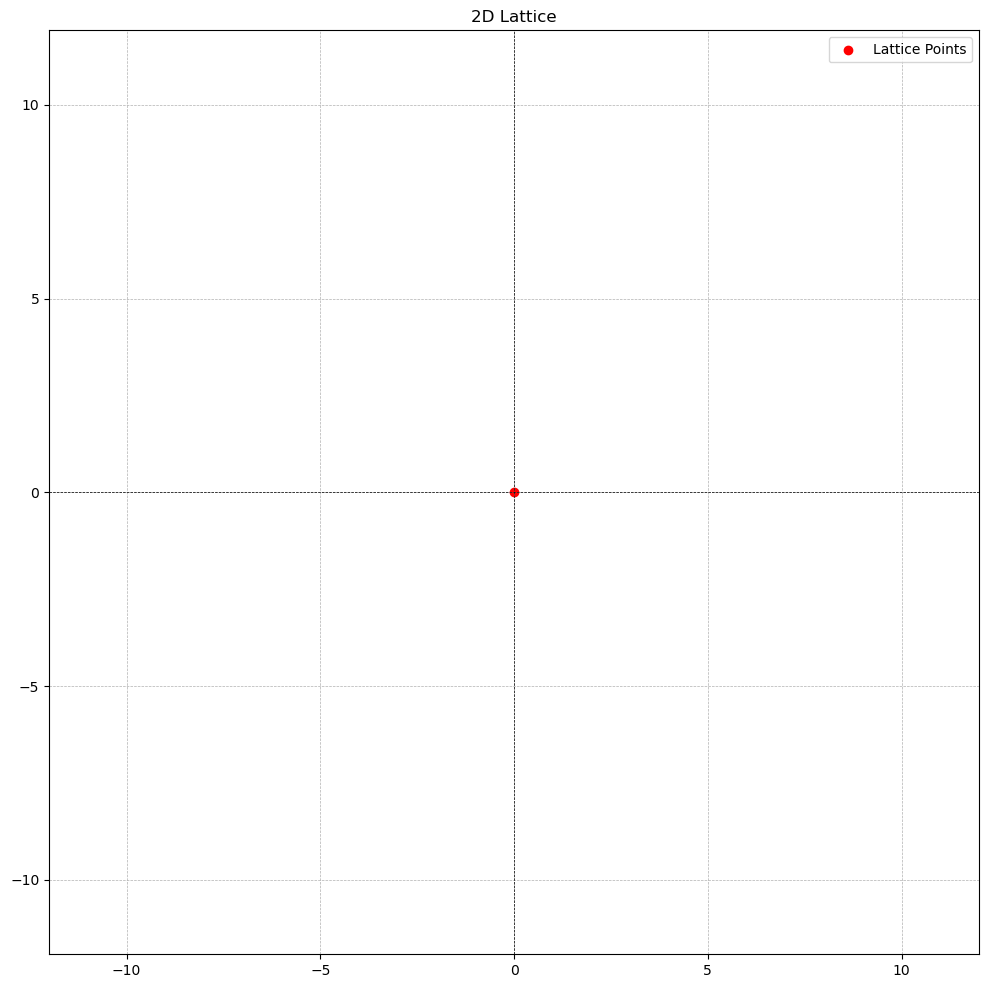

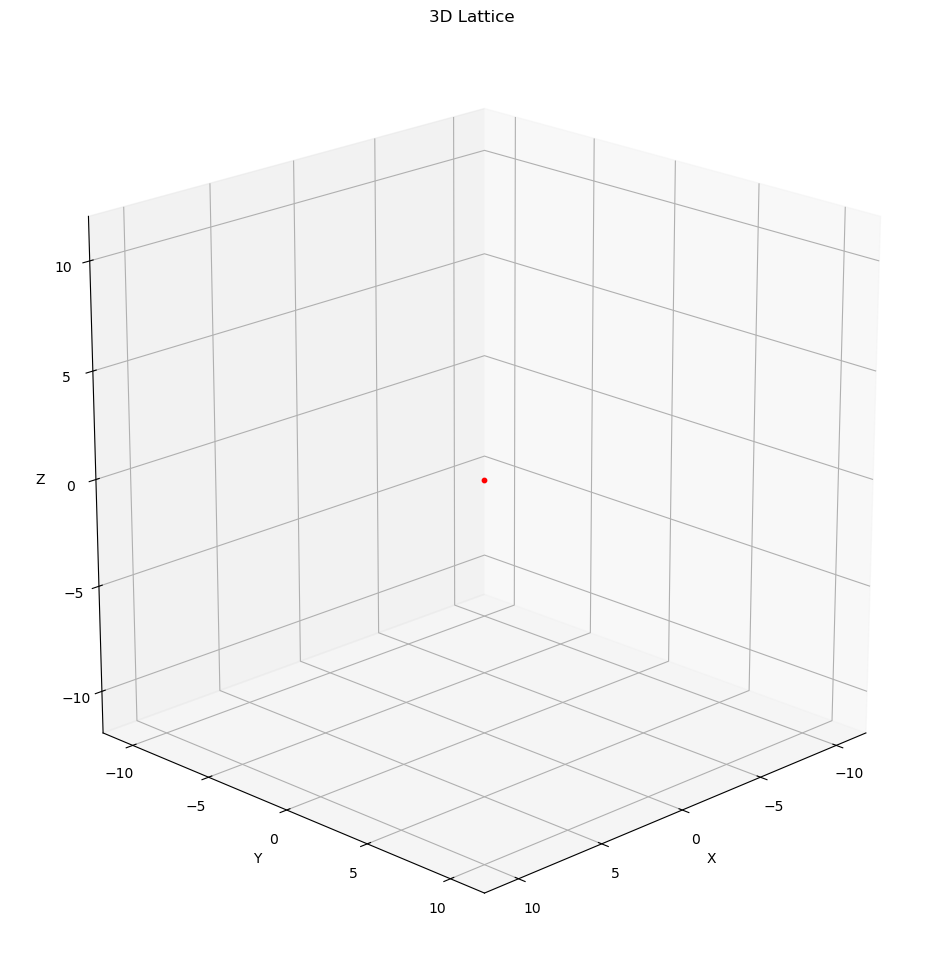

In [70]:
points = points_generator_for_2d(np.array([0, 0]), np.array([0, 0]))
plotter_2d(points)
points = points_generator_for_3d(np.array([0, 0, 0]), np.array([0, 0, 0]), np.array([0, 0, 0]))
plotter_3d(points)

- The integers $\mathbb{Z} \in \mathbb{R}$ form a 1-dimensional lattice $L$.

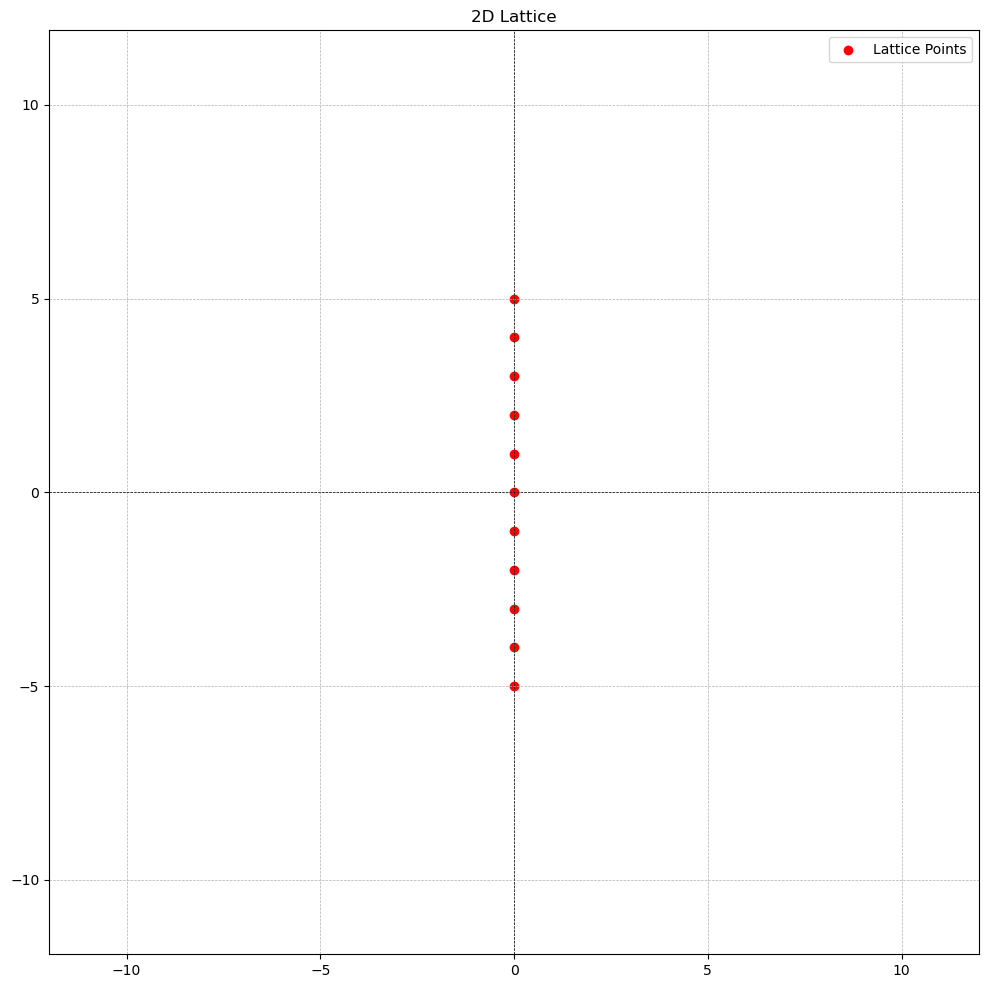

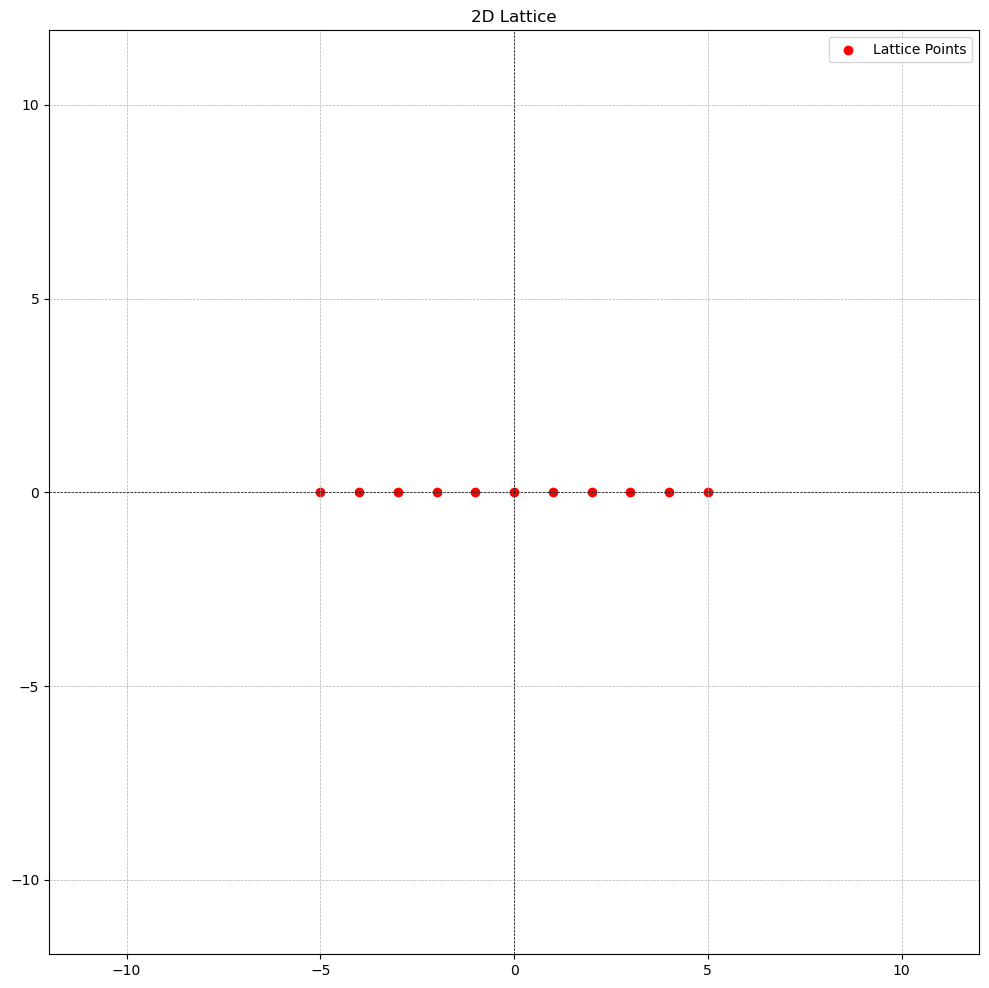

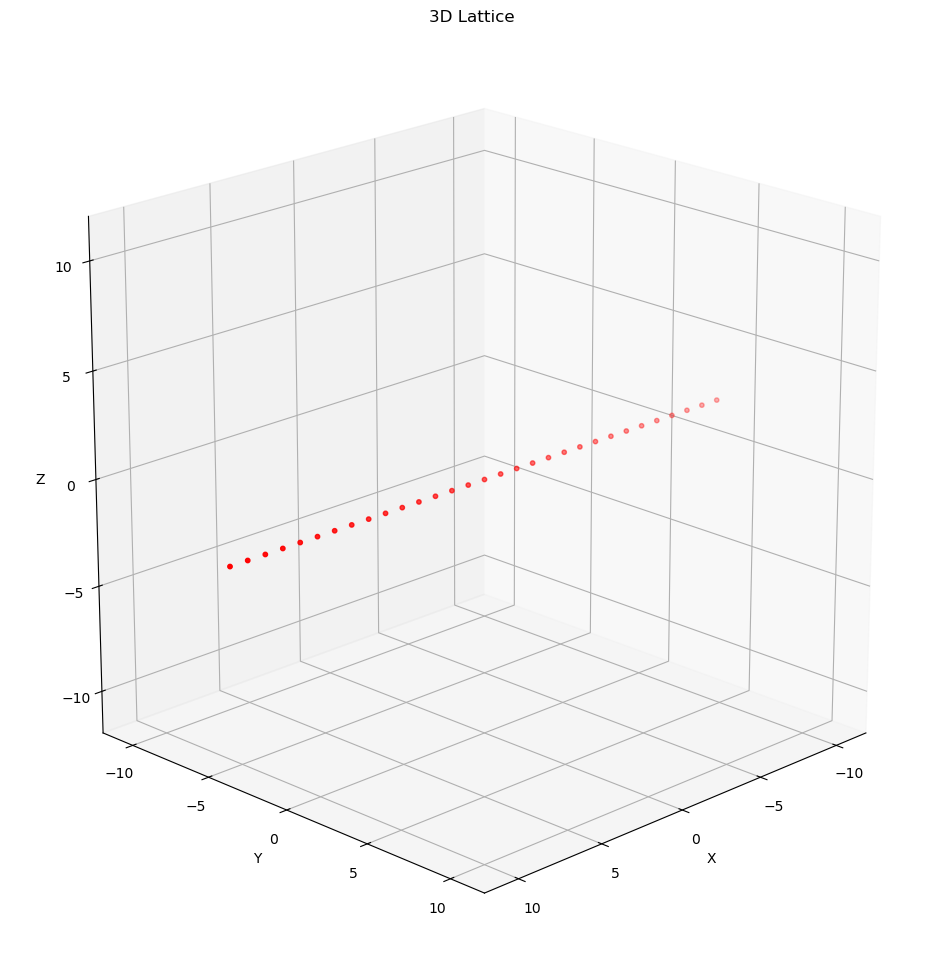

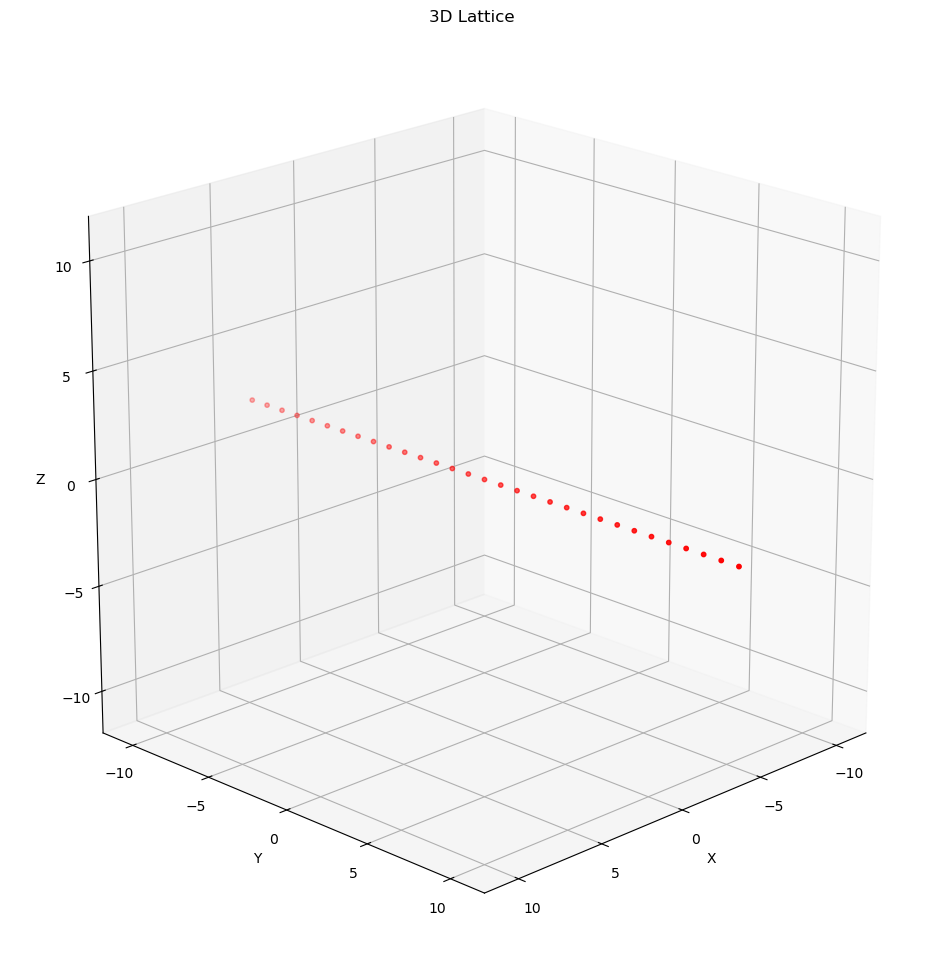

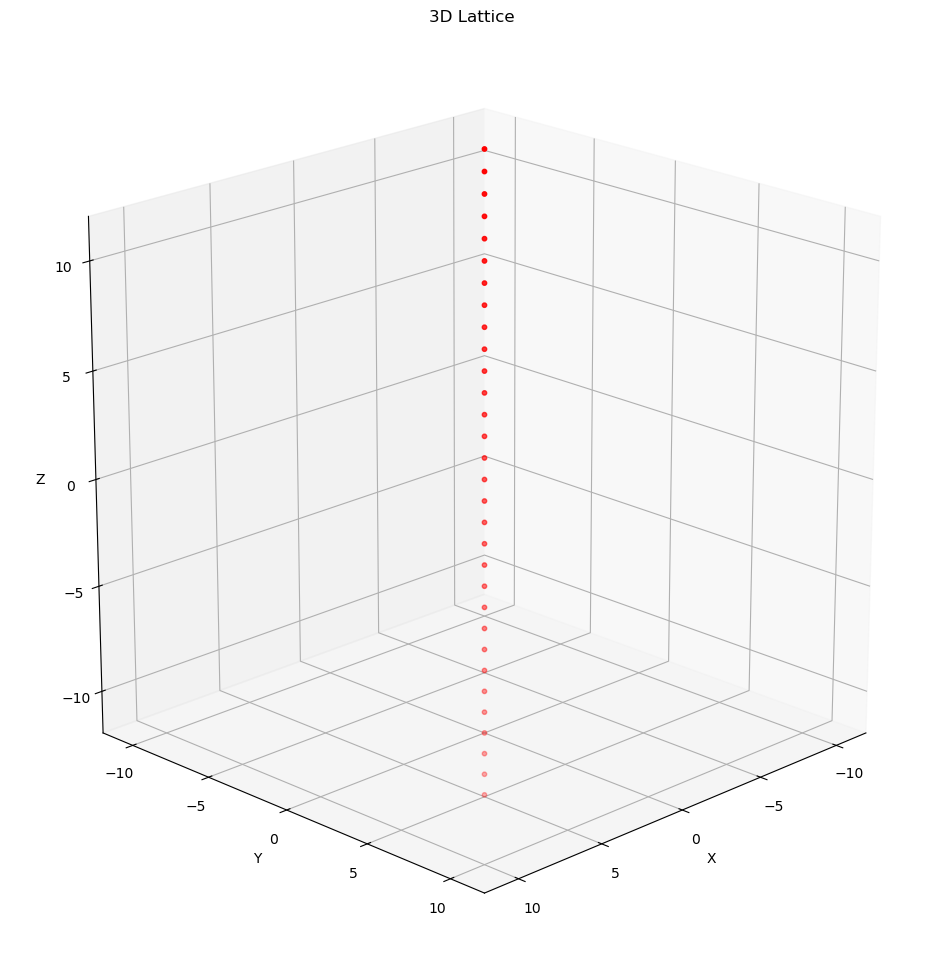

In [73]:
points = points_generator_for_2d(np.array([0, 0]), np.array([0, 1]))
plotter_2d(points)
points = points_generator_for_2d(np.array([1, 0]), np.array([0, 0]))
plotter_2d(points)
points = points_generator_for_3d(np.array([1, 0, 0]), np.array([0, 0, 0]), np.array([0, 0, 0]))
plotter_3d(points)
points = points_generator_for_3d(np.array([0, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 0]))
plotter_3d(points)
points = points_generator_for_3d(np.array([0, 0, 0]), np.array([0, 0, 0]), np.array([0, 0, 1]))
plotter_3d(points)

- The integer grid $\mathbb{Z}^n \in \mathbb{R}^n$ is an n-dimensional lattice

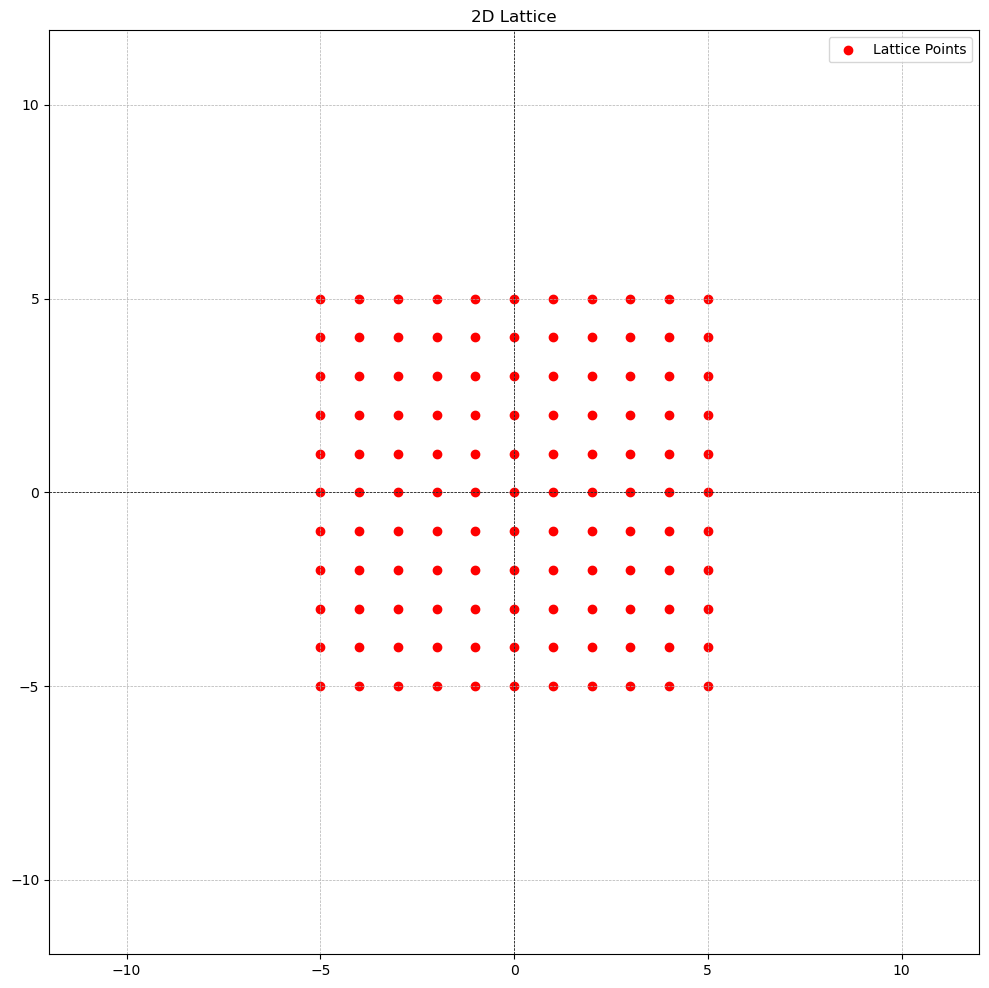

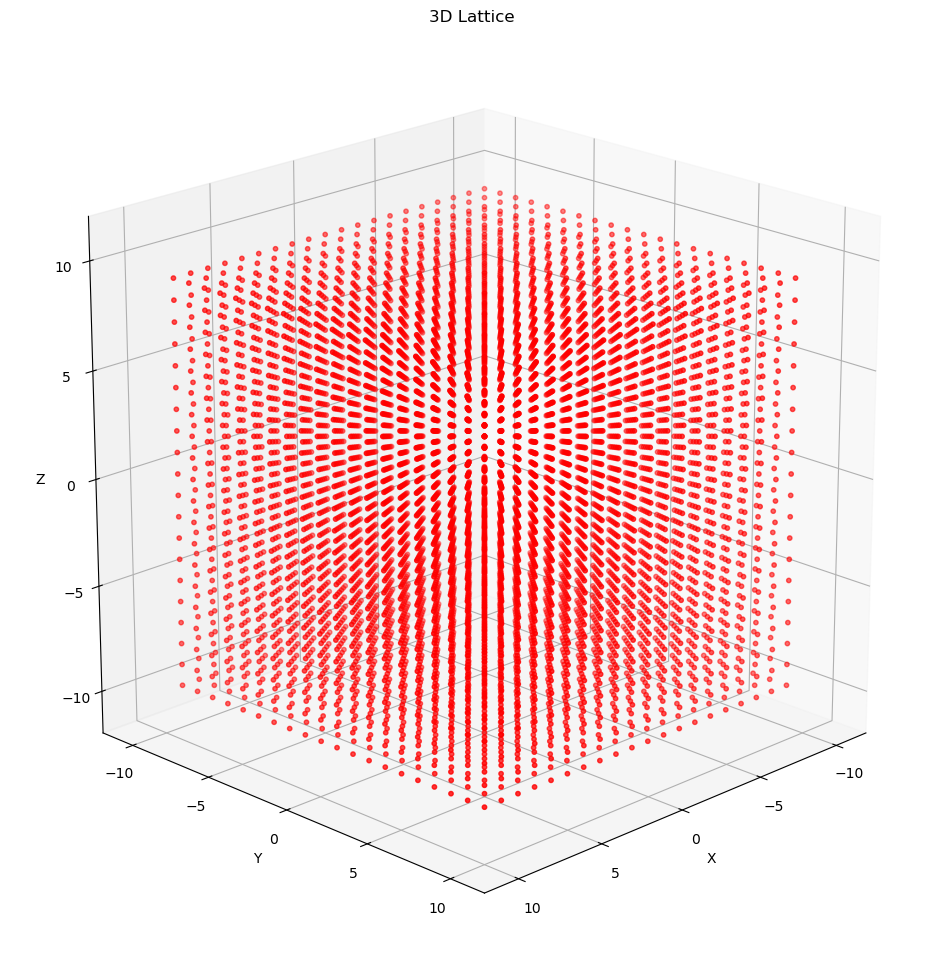

In [76]:
points = points_generator_for_2d(np.array([1, 0]), np.array([0, 1]))
plotter_2d(points)
points = points_generator_for_3d(np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1]), -10, 10)
plotter_3d(points)

- The set $\{x ∈ \mathbb{Z}^n : \sum_{i=1}^nx_i ∈ 2\mathbb{Z}\}$ is a lattice; it is often called the “checkerboard” or “chessboard” lattice, especially in two dimensions. It contains all $n$-vectors of integers $x = (x_1, x_2,...,x_n) \in \mathbb{Z}$ such that the sum of the components of $x$, i.e $\sum_{i = 1}^{x_i}$, is an even integer. That is, the sum of elements in the vector is an even integer.

  **Example**: $(0,0),(1,1),(2,4),(−3,5),(−2,−2)$
  
  **Non-example**: $(1,0),(2,3),(−1,2)$

- ***CASE 1**: Just even integers*

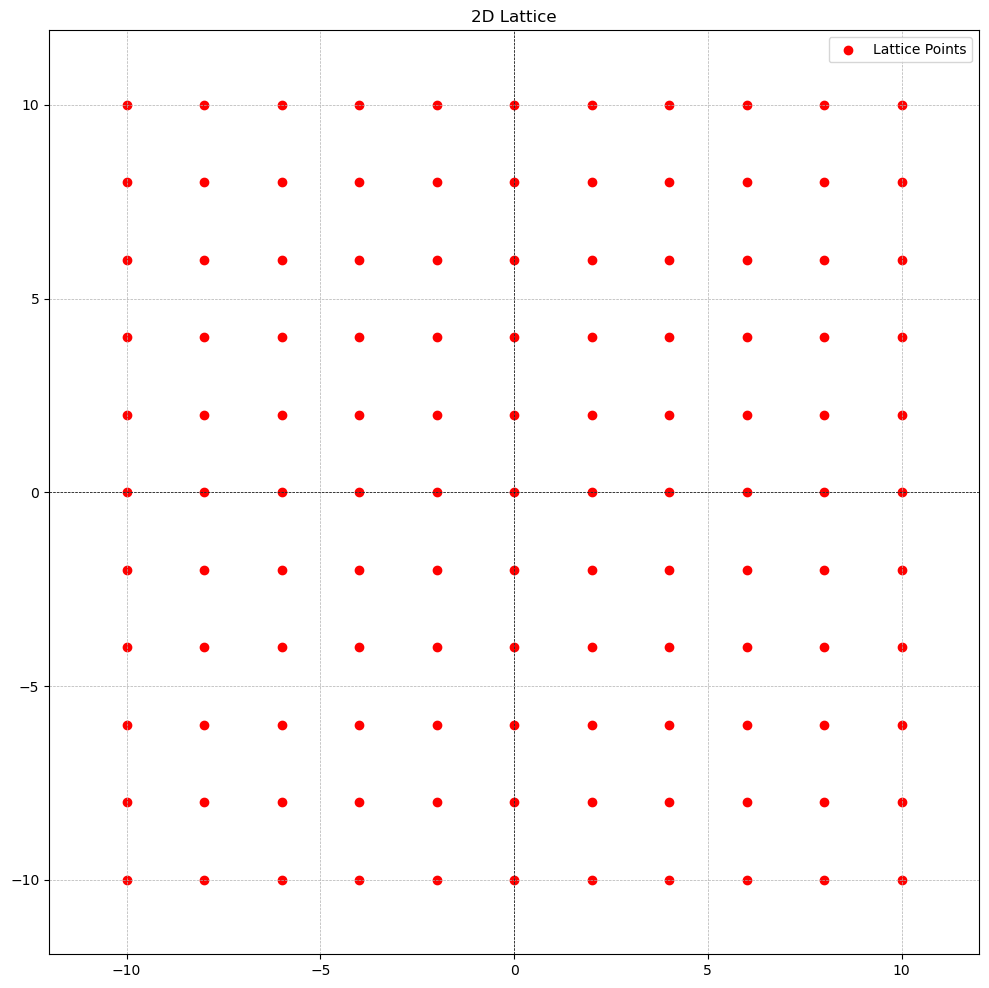

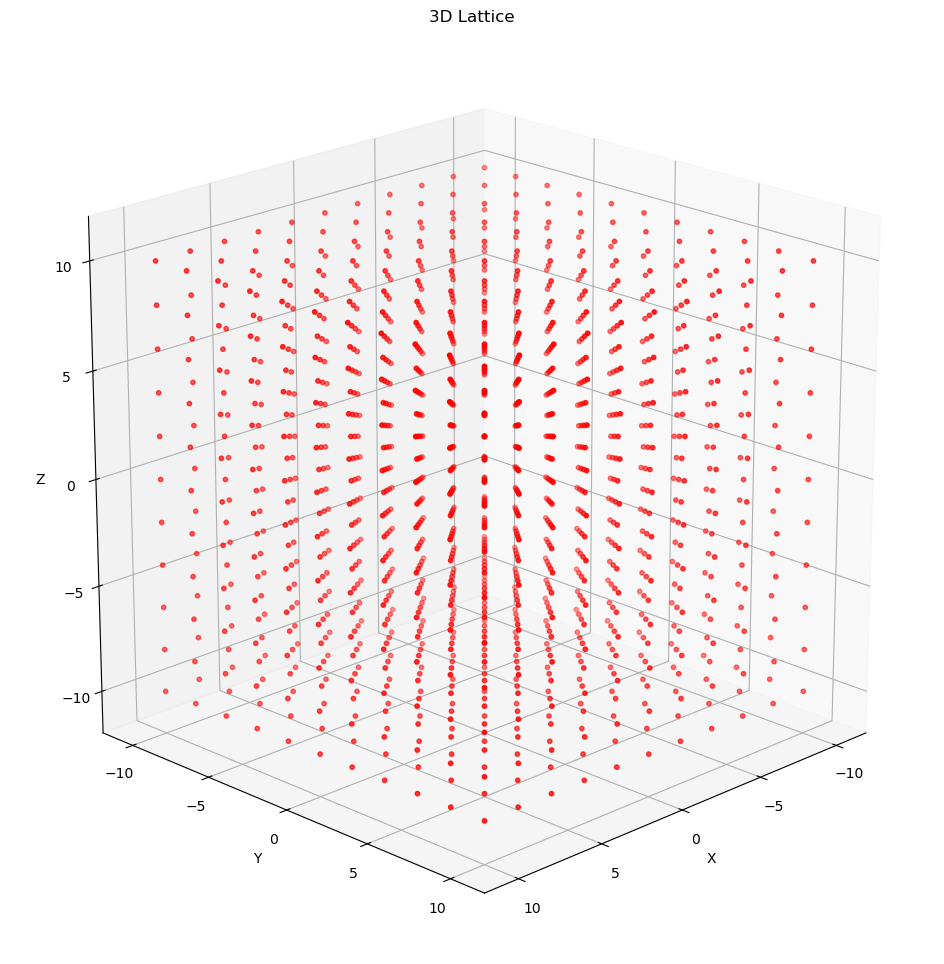

In [80]:
## CASE 1: Just even integers

# Generate lattice points
basis_1, basis_2 = np.array([1, 0]), np.array([0, 1])
x = np.arange(-5, 6)
y = np.arange(-5, 6)
z = np.arange(-5, 6)

lattice_points = np.array([2*i * basis_1 + 2*j * basis_2 for i in x for j in y])
lattice_points = np.unique(lattice_points, axis=0)
plotter_2d(lattice_points)

basis_1, basis_2, basis_3 = np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])
lattice_points = np.array([2*i * basis_1 + 2*j * basis_2 + 2*k * basis_3 for i in x for j in y for k in z])
lattice_points = np.unique(lattice_points, axis=0)
plotter_3d(lattice_points)

- ***CASE 2**: random 2-tuples with sum of even integer*

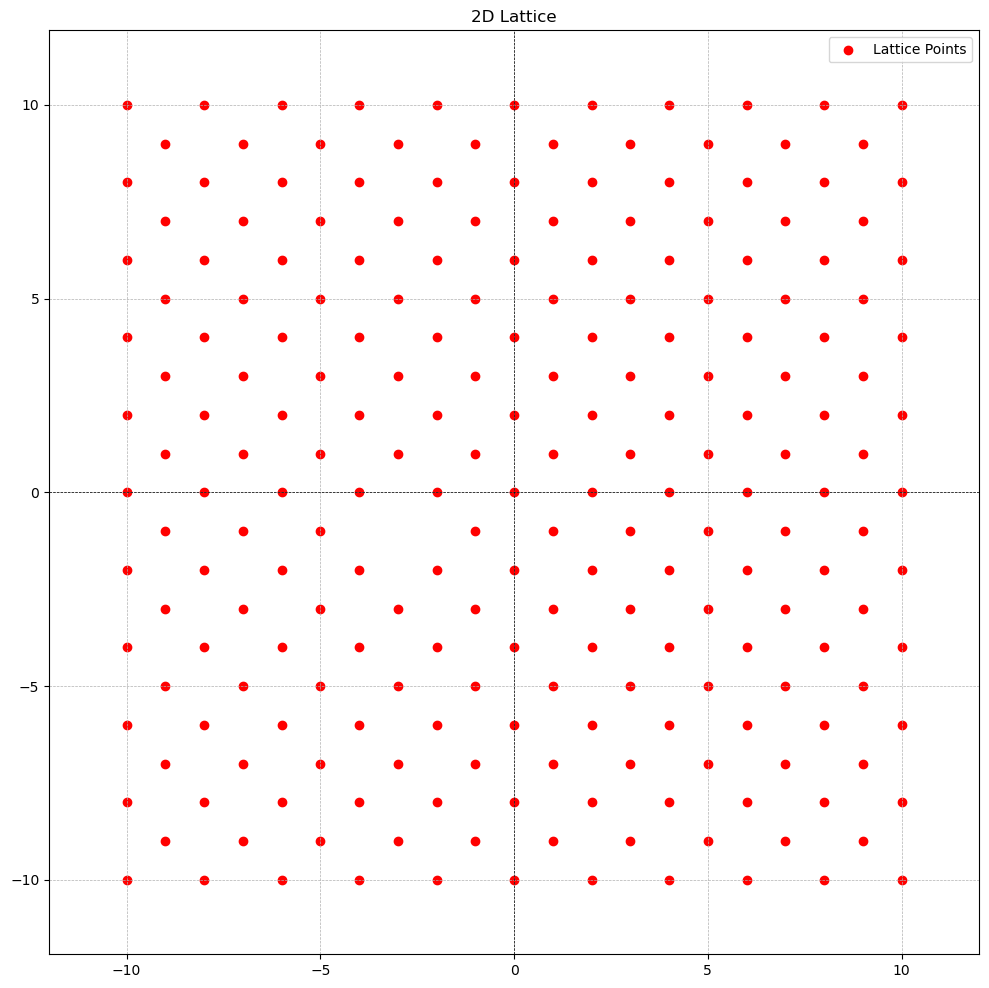

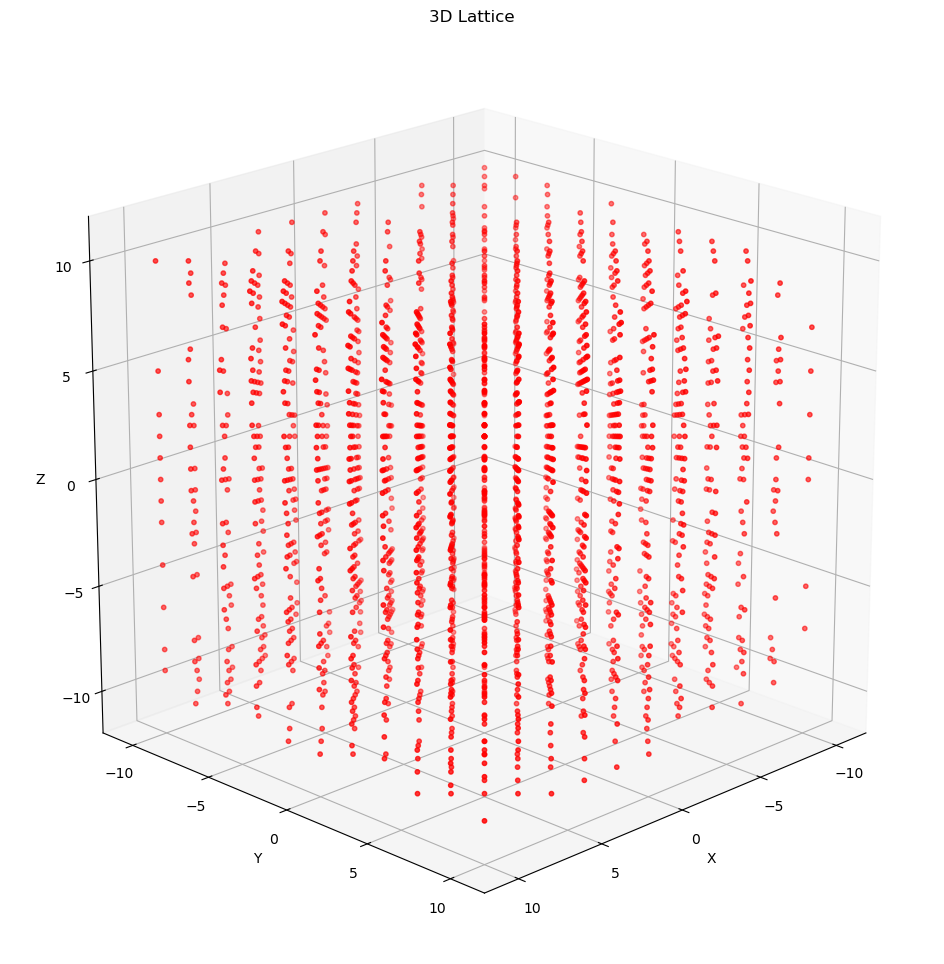

In [83]:
from random import randint, uniform

## CASE 2: random 2-tuples with sum of even integer

# Generate lattice points
basis_1, basis_2 = np.array([1, 0]), np.array([0, 1])
x = np.arange(-5, 5)
y = np.arange(-5, 5)
lattice_points = []
while len(lattice_points) < 1000:
    i = randint(-10, 10)
    j = randint(-10, 10)
    if (i + j) % 2 == 0:
        lattice_points.append([i, j])
    else: 
        continue
lattice_points = np.array(lattice_points)
lattice_points = np.unique(lattice_points, axis=0)
plotter_2d(lattice_points)

basis_1, basis_2, basis_3 = np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])
x = np.arange(-5, 6)
y = np.arange(-5, 6)
z = np.arange(-5, 6)
lattice_points = []
while len(lattice_points) < 3000:
    i = randint(-10, 10)
    j = randint(-10, 10)
    k = randint(-10, 10)
    if (i + j) % 2 == 0:
        lattice_points.append([i, j, k])
    else: 
        continue
lattice_points = np.array(lattice_points)
lattice_points = np.unique(lattice_points, axis=0)
plotter_3d(lattice_points)

- The rationals $\mathbb{Q} \subset \mathbb{R}$ do not form a lattice, because although they form a subgroup, it is not discrete: there exist rational numbers that are arbitrarily close to zero.

  For two arbitrary rational numbers $r_1$ and $r_2$, where $r_1 \lt r_2$ there are inifinitely many rational numbers between them therefore making it impossible for either $r_1$ and $r_2$ to be discrete.

  For example, below is a graph of points in $\mathbb{Q}$ between 1 and 2.

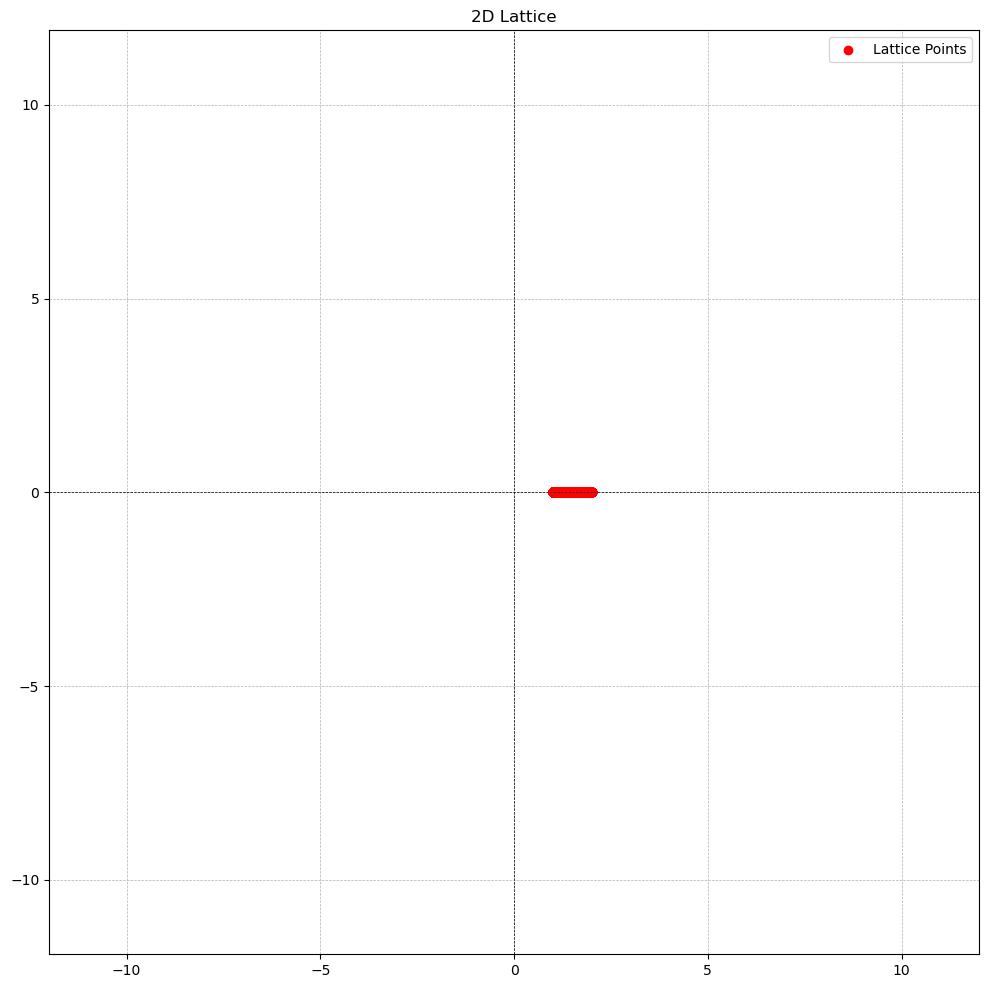

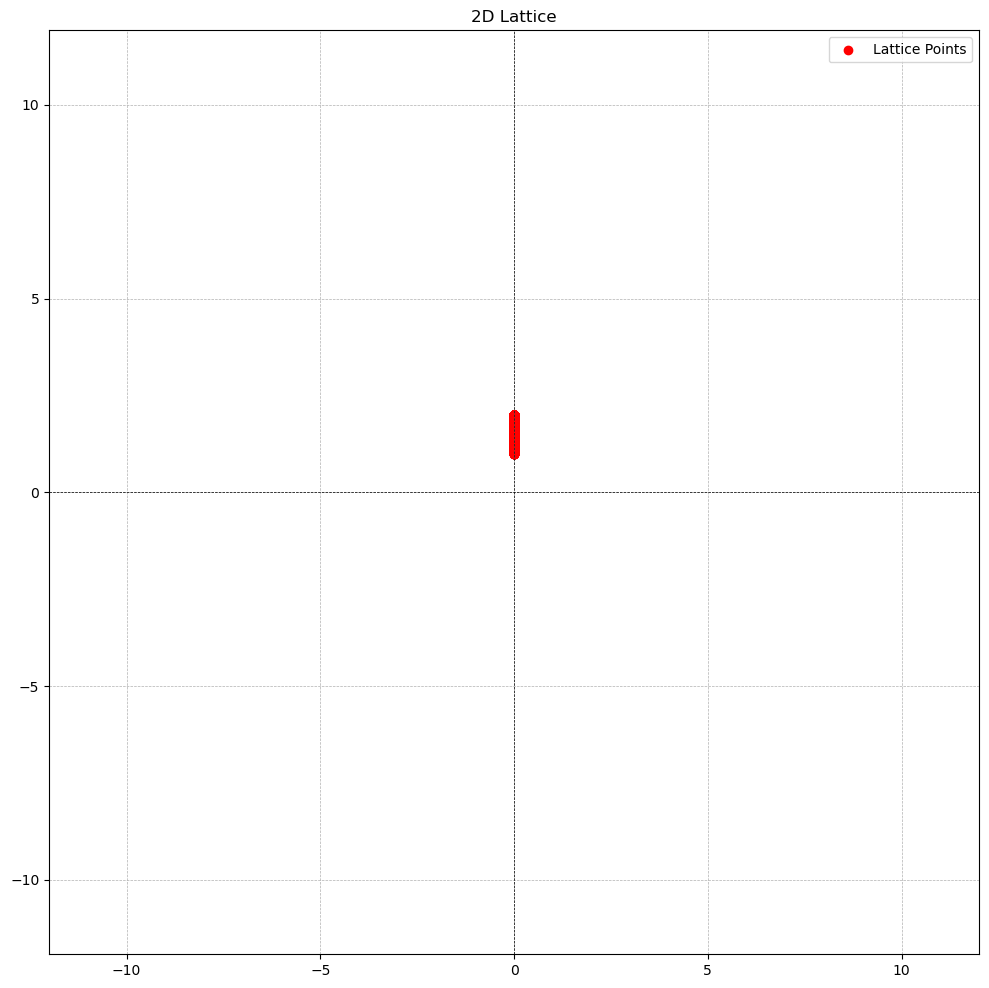

In [86]:
rational_points = [[uniform(1, 2), 0]  for i in range(1, 100) for j in range(1, 100)]
rational_points = np.array(rational_points)
rational_points = np.unique(rational_points, axis=0)
plotter_2d(rational_points)

rational_points = [[0, uniform(1, 2)]  for i in range(1, 100) for j in range(1, 100)]
rational_points = np.array(rational_points)
rational_points = np.unique(rational_points, axis=0)
plotter_2d(rational_points)

- The odd integers $2\mathbb{Z} + 1$ do not form a lattice, because although they are discrete, they do not form a subgroup of $\mathbb{R}$.

  Recall, that a lattice $L$ is an addictive subgroup if it contains identity element $0 \in \mathbb{R}$(the all-zeros vector), and if any $x, y \in L$, we have $-x \in L$ and $x + y \in L$.

  The odd integers $2\mathbb{Z} + 1$ do not contain 0

---

## Basis

A basis $B = \{b_1, b_2, ..., b_n\} \subset \mathbb{R}^n$ of a lattice $L$ is a set of linearly independent vector whose integer linear combinations generate the lattice:$$L = L(B):= \{\sum_{i = 1}^{n}z_ib_i: z_i \in \mathbb{Z}\}$$

Recall two vectors $b_1$ and $b_2$ are said to be linearly independent if $w * b_1 \neq b_2$ and $w * b_2 \neq b_1$ where $w$ is an arbitrary integer.

For example, $b_1 = [1, 2, 3]$ and $b_2 = [5, 3, 7]$ are linearly independent while $b_3 = [1, 2, 3]$ and $b_4 = [2, 4, 6]$ are not. Why? $w_1 * b_3 = b_4$ and $w_2 * b_4 = b_3$ where $w_1$ and $w_2$ are $2$ and $\dfrac{1}{2}$ respectively.

But, we can't find any $w_i$ for which $w_i * b_1 == b_2$ and vice versa.

In this case, this is generalized to vectors of $B = \{b_1, b_2, ..., b_n\}$ where any two vectors in the set $B$ are linearly independent.

We can also represent a basic $B$ as a matrix. This is an $n*n$ matrix where the basis vectors are the ordered columns of the matrix. This is a non-singular matrix. 

With this we can represent a lattice $L = B * \mathbb{Z}^n = \{Bz: z \in \mathbb{Z}^n \}$

For example, given a basis $B = \{b_1, b_2, b_3\}$ where $b_1 = [1, 0, 0]$, $b_2 = [0, 1, 0]$ and $b_3 = [0, 0, 1]$ respectively, we have a matrix $B = \begin{bmatrix}1 & 0 & 0 \\[0.3em]0 & 1 & 0 \\[0.3em]0 & 0 & 1
\end{bmatrix}$ and the finite set of integer vectors $z = \{v_1, v_2, v_3 \}$ where $v_1 = [1, 2, 5]$, $v_2 = [-5, 7, 9]$ and $v_3 = [-9, 3, 7]$ respectively, we can generate a lattice $L$ with three points $[1, 2, 5]$, $[-5, 7, 9]$ and $[-9, 3, 7]$.

This way of representing the basis is instrumental in understanding the next topic: **unimodular matrix**

### Unimodular Matrix

Bases $B_1$, $B_2$ generate the same if lattice $L$ if and only if there exists a unimodular $U \in \mathbb{Z}^{n \times n}$ such that $B_1 = B_2U$.

An integer matrix is said to unimodular if it determinant is $\pm1$.

This property for two bases being able to generate the same lattice $L$ is what makes lattice-based cryptography possible.

We can efficiently test whether two given matrices $B_1$, $B_2$ generate the same lattice, by checking whether $B_1^{-1}·B_2$ is unimodular.

---

## Norms

A *norm* or *vector norm* is a generalization of what we would normally call the length or magnitude of a vector.

Recall, $||{\mathbf{v}}|| = \sqrt{v_1^2 + v_2^2 + v_3^2 + .... + v_n^2}$, the **magnitude** or **length** or **size** of a vector ${\mathbf{v}}$. This is a type of norm called the **Euclidean norm** $||\mathbf{v}||_2$.

Formally, a norm on a vector space $V$ over $\mathbb{R}$ or $\mathbb{C}$ is a function $||.||:V \to \mathbb{R}$ that satisfies the properties for all vectors $\mathbf{v}$, $\mathbf{w}$ $\in$ $V$ and all scalars $\alpha$:

1. **Non-negativity**: $||\mathbf{v}|| \geq 0$, and $||\mathbf{v}|| = 0 \iff \mathbf{v} = 0$

2. **Homogeneity**: $||\alpha \mathbf{v}|| = |\mathbf{\alpha}|||\mathbf{v}||$

3. **Triangle Inequality**: $||\mathbf{v} + \mathbf{w}|| \leq ||\mathbf{v}|| + ||\mathbf{w}||$

For example, the Euclidean norm for the vector $\mathbf{v} = [3, 4]$ is $||\mathbf{v}||_2 = \sqrt{3^2 + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5$.

The graphical representation is displayed below. The length of the arrow is $5$.

This graph would help us understand the next topic: ***$i$*-th successive minimum**

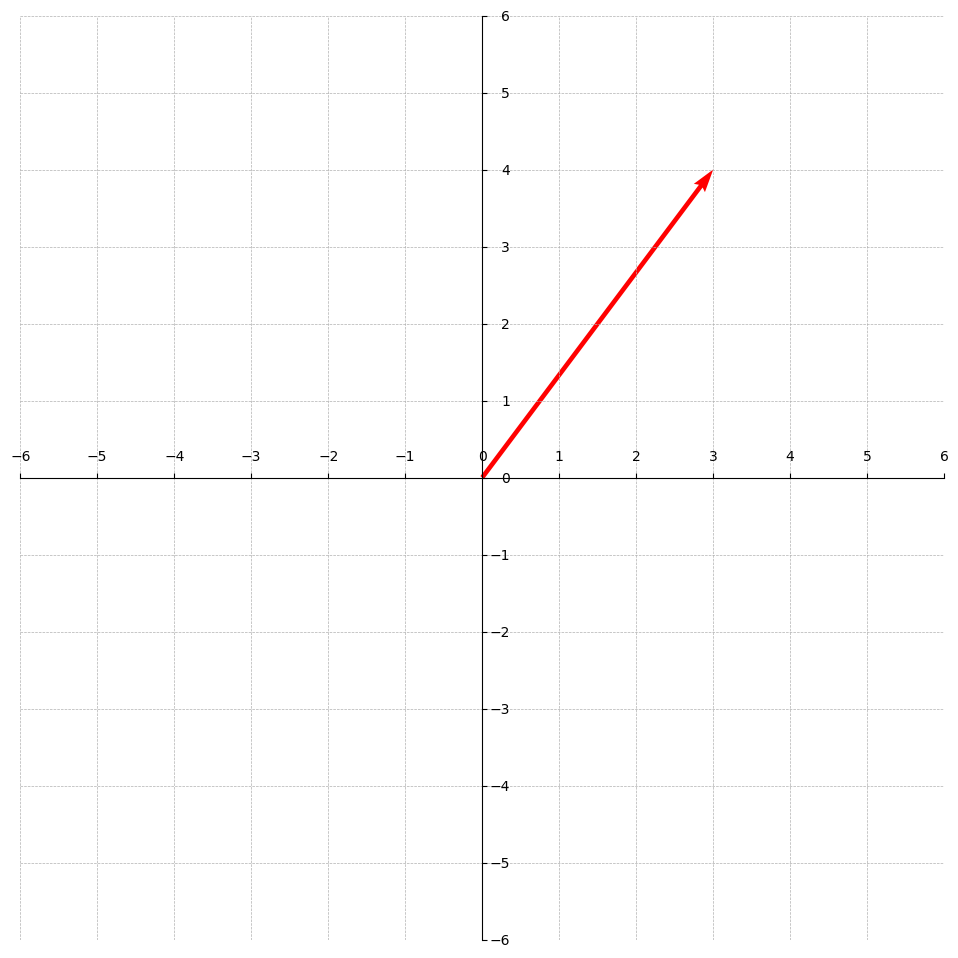

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Define the vector
v = np.array([3, 4])

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 12))  # Increase figure size

# Plot the vector with a thicker line
ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', width=0.005)

# Set equal aspect ratio and larger axis limits
axis_limit = max(abs(v)) + 2  # Ensure extra space
ax.set_xlim(-axis_limit, axis_limit)
ax.set_ylim(-axis_limit, axis_limit)
ax.set_aspect('equal')

# Move x and y axes to the center
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Increase tick size and move inside
ax.tick_params(axis='both', which='major', labelsize=10, direction='in', pad=-20)

# Set grid and larger labels
ax.grid(True, linestyle="--", linewidth=0.5)
ax.set_xticks(range(-axis_limit, axis_limit + 1))
ax.set_yticks(range(-axis_limit, axis_limit + 1))

# Show plot
plt.show()

Other norms include the *Manhattan Norm*, *Maximum Norm* and *p-norm*. For now, we only care about Euclidean norms.

---

### Successive Minimum

The Euclidean Norm $||\mathbf{v}||_2$ of any vector $\mathbf{v}$ in a lattice $L$ can be interpreted as the **radius** $r$ of a circle (or sphere in higher dimensions) where the origin $(0, 0)$ of the graph is the centre of the circle as shown in the diagram below. 

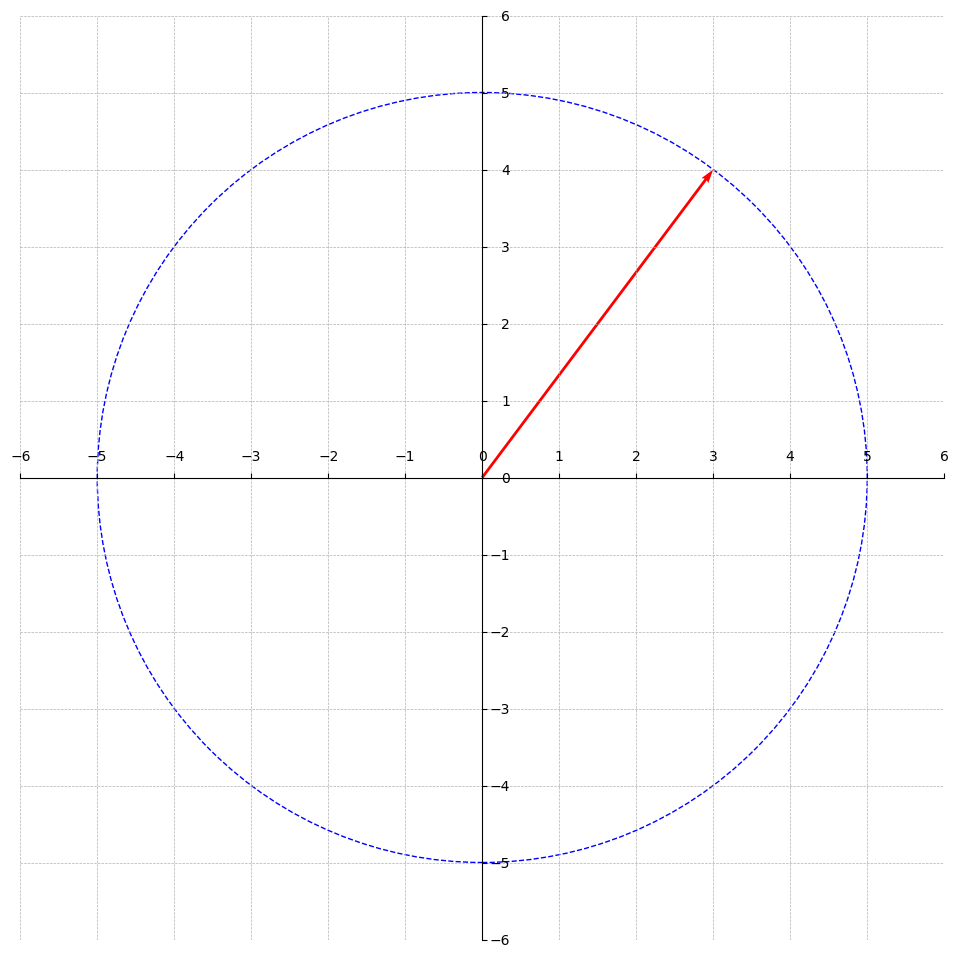

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Define the vector
v = np.array([3, 4])

# Compute the radius (Euclidean norm)
radius = np.linalg.norm(v)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the vector
ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r' , width=0.0030)

# Draw a circle centered at (0,0) with radius ||v||
circle = plt.Circle((0, 0), radius, color='blue', fill=False, linewidth=1, linestyle='--')
ax.add_patch(circle)  # Add the circle to the plot

# Set equal aspect ratio and limits
axis_limit = max(abs(v)) + 2
ax.set_xlim(-axis_limit, axis_limit)
ax.set_ylim(-axis_limit, axis_limit)
ax.set_aspect('equal')

# Move x and y axes to the center
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Increase tick size and move inside
ax.tick_params(axis='both', which='major', labelsize=10, direction='in', pad=-20)

# Set grid and larger labels
ax.grid(True, linestyle="--", linewidth=0.5)
ax.set_xticks(range(-axis_limit, axis_limit + 1))
ax.set_yticks(range(-axis_limit, axis_limit + 1))

# Show plot
plt.show()

Given a lattice $L$ and a norm(i.e. the Euclidean norm), the $i$-th successive minimum $\lambda_i(L)$ is the smallest radius $r$ such that $L$ contains at least $i$ linearly independent lattice vectors of norm at most $r$ within a ball of radius $r$ centered at the origin.

In other words, what is the smallest radius $r$ such that there exists $i$ linearly independent vectors $\mathbf{v_1}, \mathbf{v_2}, ..., \mathbf{v_i}$ in the lattice $L$ if we draw a circle(or, sphere in higher dimensions) of radius $r$? Recall, that we interpret the norm of a vector as a radius $r$ when the centre is at the origin $(0, 0)$.  

For example, if we generate the vectors $\mathbf{v_1} = [4, 2]$, $\mathbf{v_2} = [-5, -5]$ and $\mathbf{v_3} = [2, 11]$ given the basis points $b_1 = [2, 1]$ and $b_2 = [1, 3]$ creating a a lattice $L$, what is the 1st successive minimum $\lambda_1(L)$? Or, What is $i$-th successive minimum when $i$ is 1?

We start by finding the norm of the vectors(including the basis vectors):

- $||\mathbf{b_1}||_2 = \sqrt{2^2 + 1^2} = \sqrt{4 + 1} = \sqrt{5} = 2.24$
- $||\mathbf{b_2}||_2 = \sqrt{1^2 + 3^2} = \sqrt{1 + 9} = \sqrt{10} = 3.16$
- $||\mathbf{v_1}||_2 = \sqrt{4^2 + 2^2} = \sqrt{16 + 4} = \sqrt{20} = 4.47$
- $||\mathbf{v_2}||_2 = \sqrt{-5^2 + -5^2} = \sqrt{25 + 25} = \sqrt{50} = 7.07$
- $||\mathbf{v_3}||_2 = \sqrt{2^2 + 11^2} = \sqrt{4 + 121} = \sqrt{125} = 11.18$

The smallest radius is $2.24$ and we have one linearly independent vector $b_1 = [2, 1]$. Notice how it is the closest vector to the origin. It is called the smallest nonzero vector in the lattice.

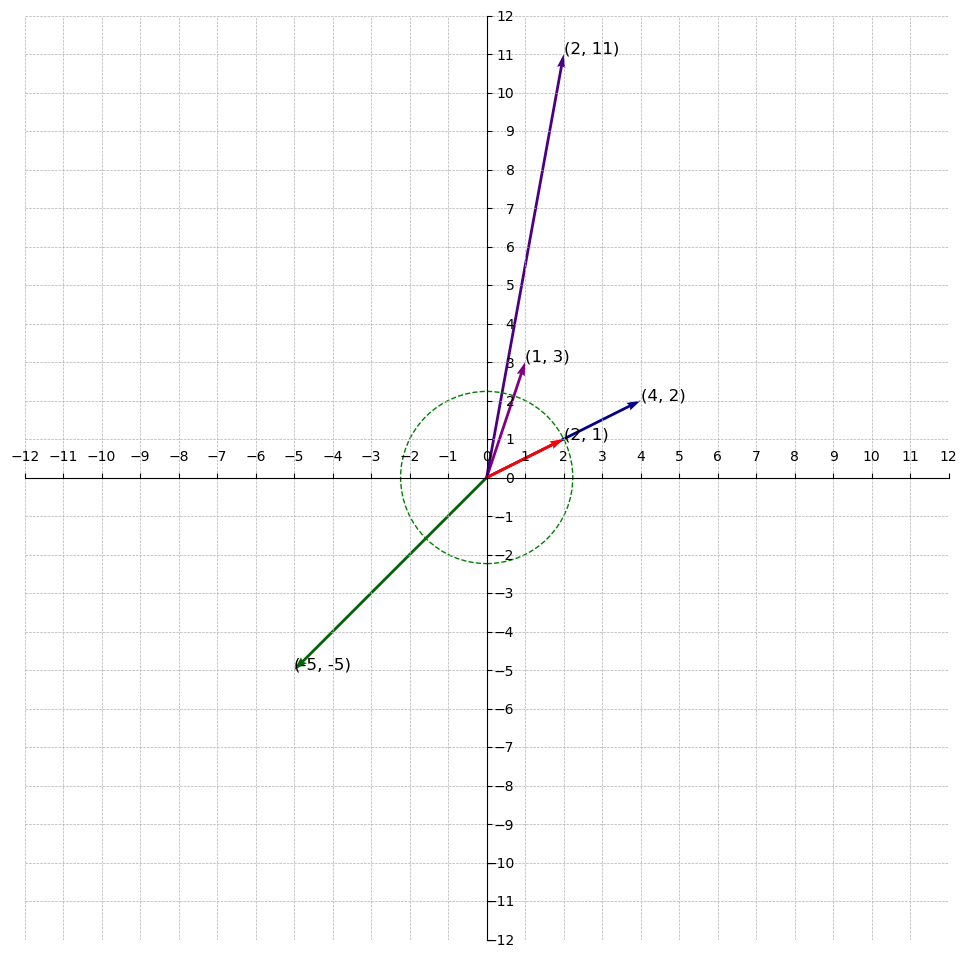

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Define the vector
vectors = np.array([[1, 3], [4, 2], [-5, -5], [2, 11], [2, 1]])

# Compute the radius (Euclidean norm)
radii = []
for vector in vectors:
    radii.append(np.linalg.norm(vector))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# colors = plt.cm.cividis(np.linspace(0, 1, 5))
dark_colors = ['purple', 'darkblue', 'darkgreen', 'indigo', 'red']

# Plot the vector
for i, vector in enumerate(vectors):
    ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=dark_colors[i], width=0.0030)
    ax.text(vector[0], vector[1], f'({vector[0]}, {vector[1]})', fontsize=12, color='black')

# Draw a circle centered at (0,0) with radius ||v||
circle = plt.Circle((0, 0), radii[4], color='green', fill=False, linewidth=1, linestyle='--')
ax.add_patch(circle)  # Add the circle to the plot

# Set equal aspect ratio and limits
axis_limit = 12
ax.set_xlim(-axis_limit, axis_limit)
ax.set_ylim(-axis_limit, axis_limit)
ax.set_aspect('equal')

# Move x and y axes to the center
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Increase tick size and move inside
ax.tick_params(axis='both', which='major', labelsize=10, direction='in', pad=-20)

# Set grid and larger labels
ax.grid(True, linestyle="--", linewidth=0.5)
ax.set_xticks(range(-axis_limit, axis_limit + 1))
ax.set_yticks(range(-axis_limit, axis_limit + 1))

# Show plot
plt.show()

Again, what is the 2nd successive minimum? We are looking for the smallest linearly independent set of two vectors.

From the computed norms, we know that the second smallest vector is $b_2 = [1, 3]$ with norm of $3.16$ and the two smallest linearly independent vectors are $b_1$ and $b_2$

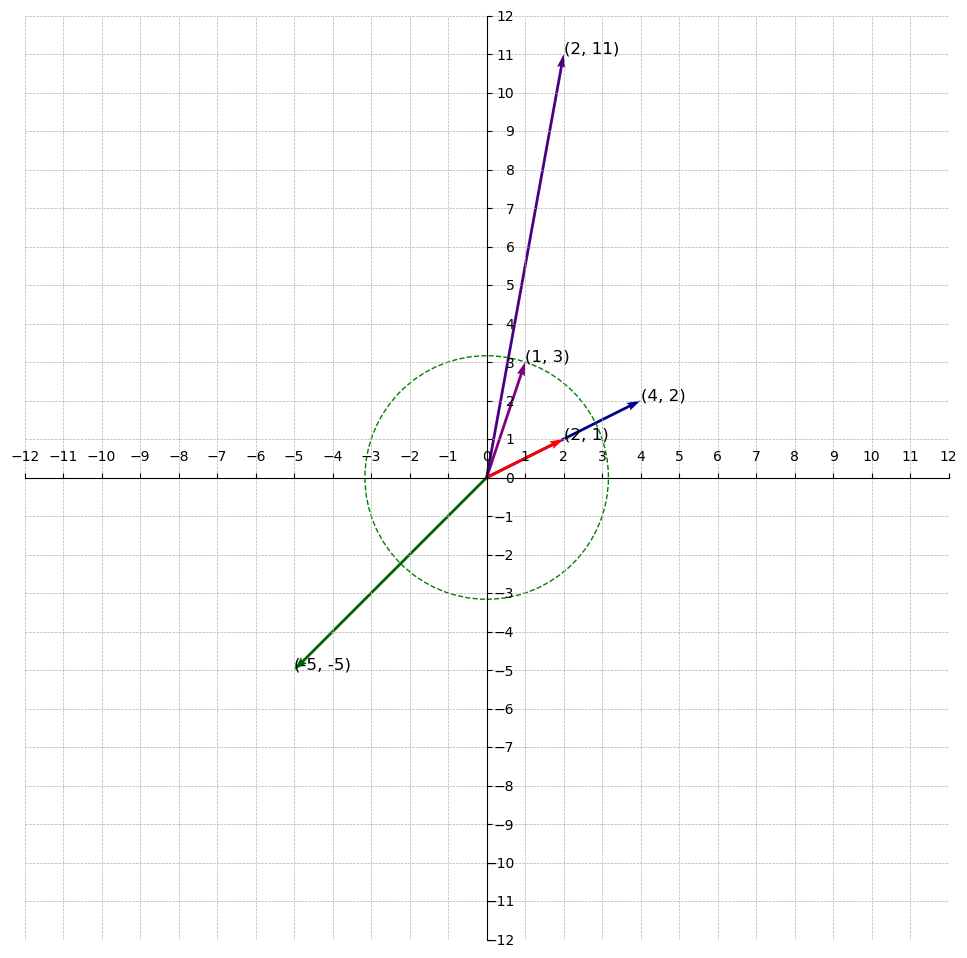

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Define the vector
vectors = np.array([[1, 3], [4, 2], [-5, -5], [2, 11], [2, 1]])

# Compute the radius (Euclidean norm)
radii = []
for vector in vectors:
    radii.append(np.linalg.norm(vector))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# colors = plt.cm.cividis(np.linspace(0, 1, 5))
dark_colors = ['purple', 'darkblue', 'darkgreen', 'indigo', 'red']

# Plot the vector
for i, vector in enumerate(vectors):
    ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=dark_colors[i], width=0.0030)
    ax.text(vector[0], vector[1], f'({vector[0]}, {vector[1]})', fontsize=12, color='black')

# Draw a circle centered at (0,0) with radius ||v||
circle = plt.Circle((0, 0), radii[0], color='green', fill=False, linewidth=1, linestyle='--')
ax.add_patch(circle)  # Add the circle to the plot

# Set equal aspect ratio and limits
axis_limit = 12
ax.set_xlim(-axis_limit, axis_limit)
ax.set_ylim(-axis_limit, axis_limit)
ax.set_aspect('equal')

# Move x and y axes to the center
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Increase tick size and move inside
ax.tick_params(axis='both', which='major', labelsize=10, direction='in', pad=-20)

# Set grid and larger labels
ax.grid(True, linestyle="--", linewidth=0.5)
ax.set_xticks(range(-axis_limit, axis_limit + 1))
ax.set_yticks(range(-axis_limit, axis_limit + 1))

# Show plot
plt.show()